In [1]:
# importing basic EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# setting figure parameters
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style='darkgrid',palette='viridis')

In [2]:
# linraries for linear regression through Scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [3]:
# linear Regression through statsmodel
import statsmodels.formula.api as smf

## Delivery Dataset

In [4]:
df = pd.read_csv('delivery_time.csv')

In [6]:
df.head(3)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6


In [7]:
df.rename(columns = {'Delivery Time': 'delivery_time','Sorting Time' : 'sorting_time'},inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
df.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
df.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [11]:
df.duplicated().sum()

0

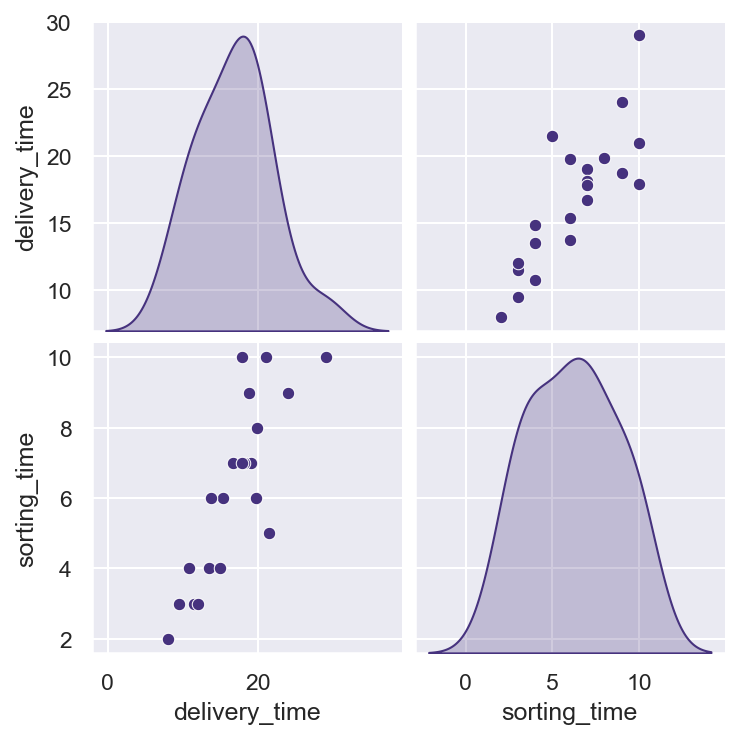

In [9]:
sns.pairplot(df,diag_kind='kde')

In [10]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


(array([0.5, 1.5]),
 [Text(0.5, 0, 'delivery_time'), Text(1.5, 0, 'sorting_time')])

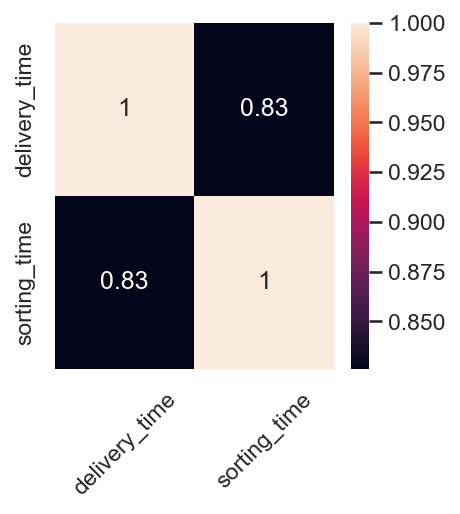

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation = 45)

### Interpretation
- Data is normally distributed
- there is a high postive correlation between sorting time and delivery time
- as the sorting time increases the delivery time also increases
- here sorting time is our feature (independent variable) & delivery time is target variable.
- we predict delivery time based on sorting time.

In [13]:
# standardizing the into standard normal form
df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

### simple Linear Regression through Statsmodel

In [41]:
# fitting the model
model = smf.ols("delivery_time~sorting_time",data = df).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        16:03:08   Log-Likelihood:                -17.759
No. Observations:                  21   AIC:                             39.52
Df Residuals:                      19   BIC:                             41.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept             0      0.129          0      1.000      -0.271       0.271
sorting_time     0.8260      0.129      6.387      0.000       0.555       1.097
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# r squared  & adjuested R squared values
print('Rsquared: ',model.rsquared)
print('Adjusted Rsquared',model.rsquared_adj)
print('Accuract: ',100*model.rsquared)

Rsquared:  0.6822714748417231
Adjusted Rsquared 0.6655489208860244
Accuract:  68.2271474841723


In [40]:
# chekcing model coefficient
model.params

Intercept       0.000000
sorting_time    0.825997
dtype: float64

In [38]:
# checking model p values 
model.pvalues

Intercept       1.000000
sorting_time    0.000004
dtype: float64

### simple Linear Regression through Scikit learn

In [18]:
# splitting the data into feature & target columns

x = np.array(df['sorting_time']).reshape((-1, 1))
y = df['delivery_time']

In [19]:
# train test split of feature & target variables 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [20]:
# creating a model instance
model = LinearRegression()

In [21]:
# training the model
model.fit(x_train, y_train)

LinearRegression()

In [26]:
model.coef_

array([0.71333985])

In [28]:
# making predictions using trained model
y_pred = model.predict(x_test)

In [33]:
# checking model parameters
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
accuracy = 100*r2_score(y_test,y_pred)
print('Mean absolute Error: ',mae)
print('Mean squared Error: ',mse)
print('root Mean squared Error: ',rmse)
print('R squared',r2_score(y_test,y_pred))
print('accuracy',accuracy)

Mean absolute Error:  0.49012077489846373
Mean squared Error:  0.2963458996253604
root Mean squared Error:  0.5443766156121701
R squared 0.8035981073023994
accuracy 80.35981073023994


- mean absolute error & root mean squared errors are low (lower the values model perfroms better)
- R squared value is high (high R squared value, model performs well)

### Final Interpretation

- **model trained by ols method using  stats model gave an accuracy of 68%**
- **model trained using sklearn's linear regression model gave a accuracy of 80%**
- overall sklearn performed well for the given data

## Salary Dataset

In [43]:
sal = pd.read_csv('Salary_Data.csv')
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [44]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [45]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [47]:
sal.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [48]:
sal.duplicated().sum()

0

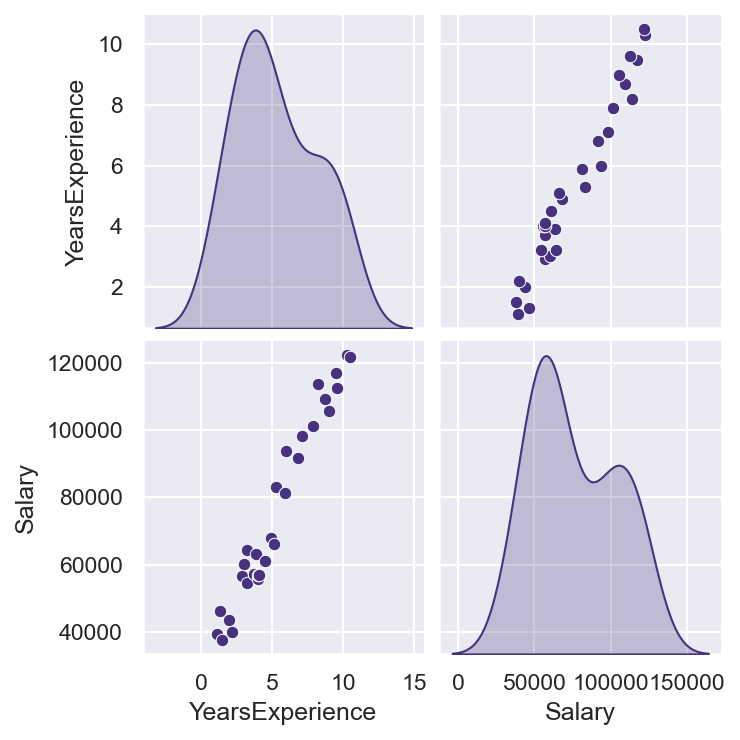

In [49]:
sns.pairplot(data = sal, diag_kind='kde')

In [53]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

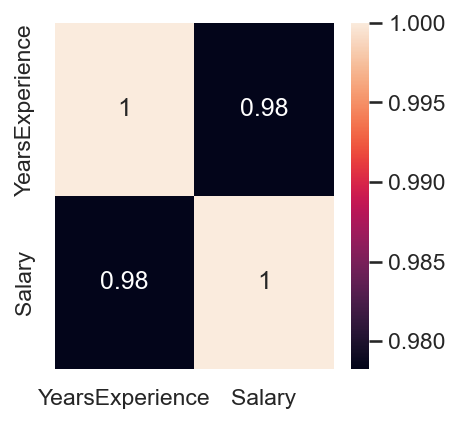

In [54]:
sns.heatmap(sal.corr(),annot=True)

### Interpretation
- Data is sort of normally distributed
- there is a very high postive correlation between year of experience and salary
- as the year of experience increases the  salary also increases
- here year of experience is our feature (independent variable) &  salary is target variable.
- we predict salary based on year of experience.

### simple Linear Regression through Statsmodel

In [58]:
# standardizing the into standard normal form
sal = pd.DataFrame(sc.fit_transform(sal),columns=sal.columns)

In [59]:
# fitting the model
model = smf.ols("Salary~YearsExperience",data = sal).fit()

In [60]:
# checking model sumary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        16:20:16   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.776e-17      0.039  -7.08e-16      1.000      -0.080       0.080
YearsExperience     0.9782      0.039     24.950      0.000       0.898       1.059
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# r squared  & adjuested R squared values
print('Rsquared: ',model.rsquared)
print('Adjusted Rsquared',model.rsquared_adj)
print('Accuract: ',100*model.rsquared)

Rsquared:  0.9569566641435086
Adjusted Rsquared 0.9554194021486339
Accuract:  95.69566641435085


In [62]:
# chekcing model coefficient
model.params

Intercept         -2.775558e-17
YearsExperience    9.782416e-01
dtype: float64

In [63]:
# checking model p values 
model.pvalues

Intercept          1.000000e+00
YearsExperience    1.143068e-20
dtype: float64

### simple Linear Regression through Scikit learn

In [64]:
# splitting the data into feature & target columns
x = np.array(sal['YearsExperience']).reshape((-1, 1))
y = sal['Salary']

In [65]:
# train test split of feature & target variables 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [66]:
# creating a model instance
model = LinearRegression()

In [67]:
# training the model
model.fit(x_train,y_train)

LinearRegression()

In [68]:
# making predictions using trained model
y_pred = model.predict(x_test)

In [69]:
# checking model parameters
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
accuracy = 100*r2_score(y_test,y_pred)
print('Mean absolute Error: ',mae)
print('Mean squared Error: ',mse)
print('root Mean squared Error: ',rmse)
print('R squared',r2_score(y_test,y_pred))
print('accuracy',accuracy)

Mean absolute Error:  0.070771585217192
Mean squared Error:  0.0067928078367413824
root Mean squared Error:  0.08241849208000218
R squared 0.993422386435995
accuracy 99.3422386435995


### Final Interpretation

- **model trained by ols method using  stats model gave an accuracy of 95%**
- **model trained using sklearn's linear regression model gave a accuracy of 99%**
- overall both model performed well with a slight difference in accuracy for the given data